## 2D Surface Fields

In [1]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
%matplotlib inline

In [2]:
# empty parametrizable cell 

cluster_scheduler_address = None

In [3]:
# Parameters
not_casename = "placeholder-casename"
cluster_scheduler_address = "tcp://10.18.206.48:44575"
subset_kwargs = {}


## Connecting to cluster

In [4]:
from dask.distributed import Client

if cluster_scheduler_address is None:
    pass
else:
    client = Client(cluster_scheduler_address)
    
    client

### Mixed layer depth

In [5]:
filepath = '/glade/work/gmarques/cesm/datasets/MLD/deBoyer/deBoyer_MLD_remapped_to_tx06v1.nc'
print('\n Reading climatology from: ', filepath)
mld_obs = xr.open_dataset(filepath)
months = [0,1,2]
obs_JFM = np.ma.masked_invalid(mld_obs.mld.isel(time=months).mean('time').values)
months = [6,7,8]
obs_JAS = np.ma.masked_invalid(mld_obs.mld.isel(time=months).mean('time').values)
obs_winter = obs_JAS.copy(); obs_summer = obs_JAS.copy()
j = np.abs( grd.geolat[:,0] - 0. ).argmin()
obs_winter[j::,:] = obs_JFM[j::,:]
obs_summer[0:j,:] = obs_JFM[0:j,:]

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
def add_labels(ax, nh='JFM', sh='JAS'):
    ax.plot([grd.geolon[0,0], grd.geolon[0,-1]], [0,0], 'k--', lw=0.5)
    ax.text(25, 7, nh, ha="center", va="center", size=12, bbox=bbox_props)
    ax.text(25, -7, sh, ha="center", va="center", size=12, bbox=bbox_props)


 Reading climatology from:  /glade/work/gmarques/cesm/datasets/MLD/deBoyer/deBoyer_MLD_remapped_to_tx06v1.nc


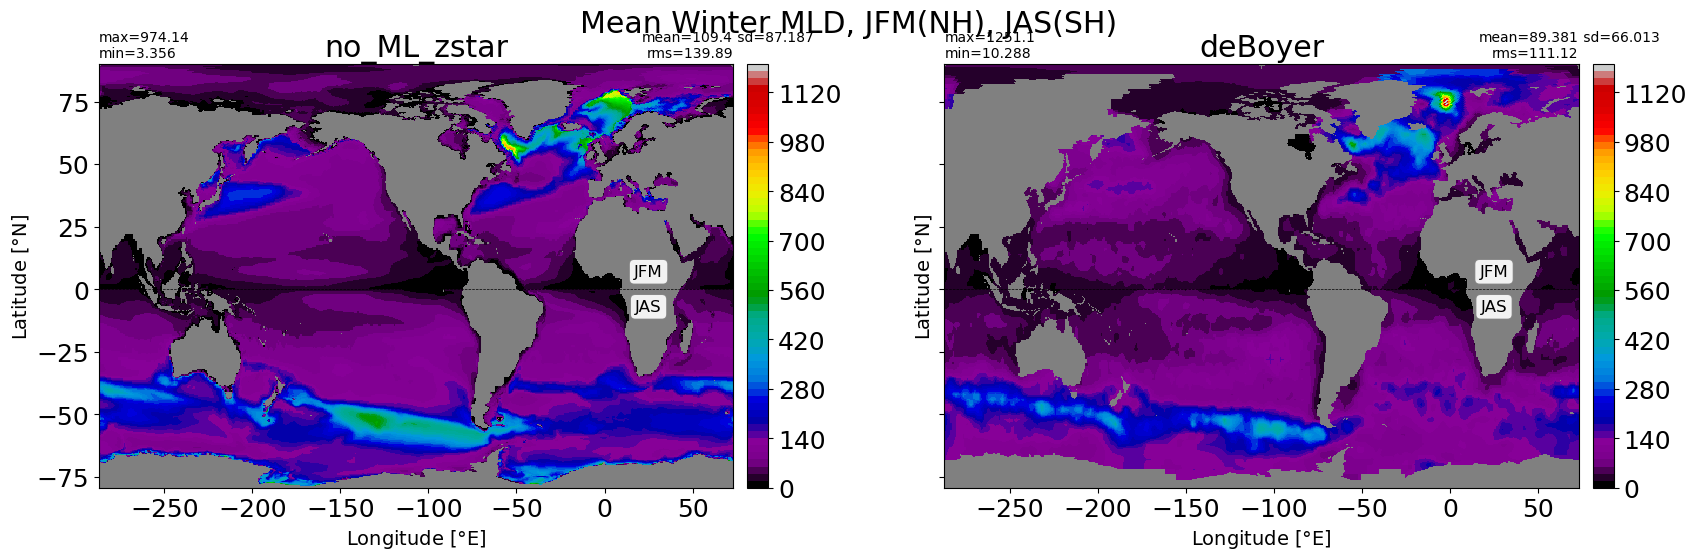

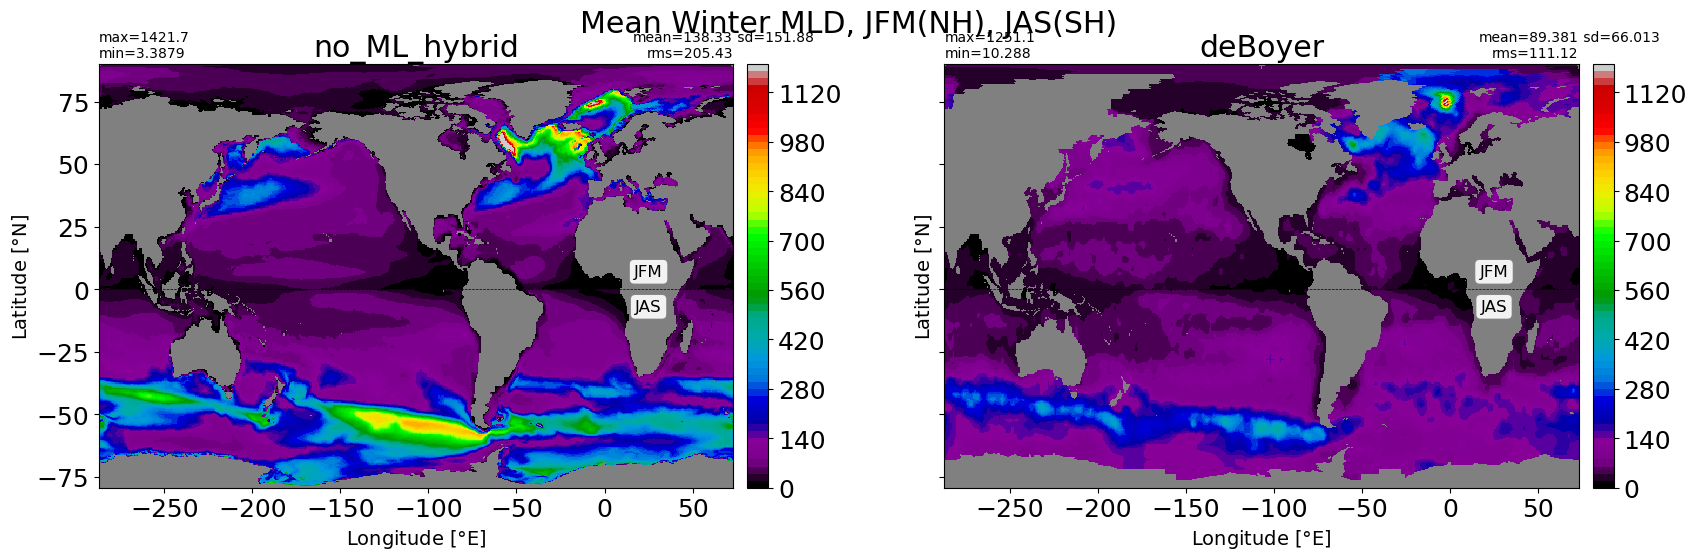

In [6]:
%matplotlib inline


for path, case, i in zip(ocn_path, casename, range(len(casename))):
    
  ds = xr.open_dataset(path+case+'_MLD_winter.nc')

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5.5), 
                       sharex=True, sharey=True)
  ax1 = ax.flatten()
  plt.suptitle('Mean Winter MLD, JFM(NH), JAS(SH)')
  # model
  control = np.ma.masked_invalid(ds.MLD_winter.values)
  xyplot(control, grd.geolon, grd.geolat, grd.area_t, 
       title=str(label[i]), axis=ax1[0], 
       clim=(0,1200), nbins=100, colormap=plt.cm.nipy_spectral,
       extend='neither')
  add_labels(ax1[0])
  # obs
  xyplot(obs_winter, grd.geolon, grd.geolat, grd.area_t, 
       title='deBoyer', axis=ax1[1], 
       clim=(0,1200), nbins=100, colormap=plt.cm.nipy_spectral, 
       extend='neither')
  add_labels(ax1[1])

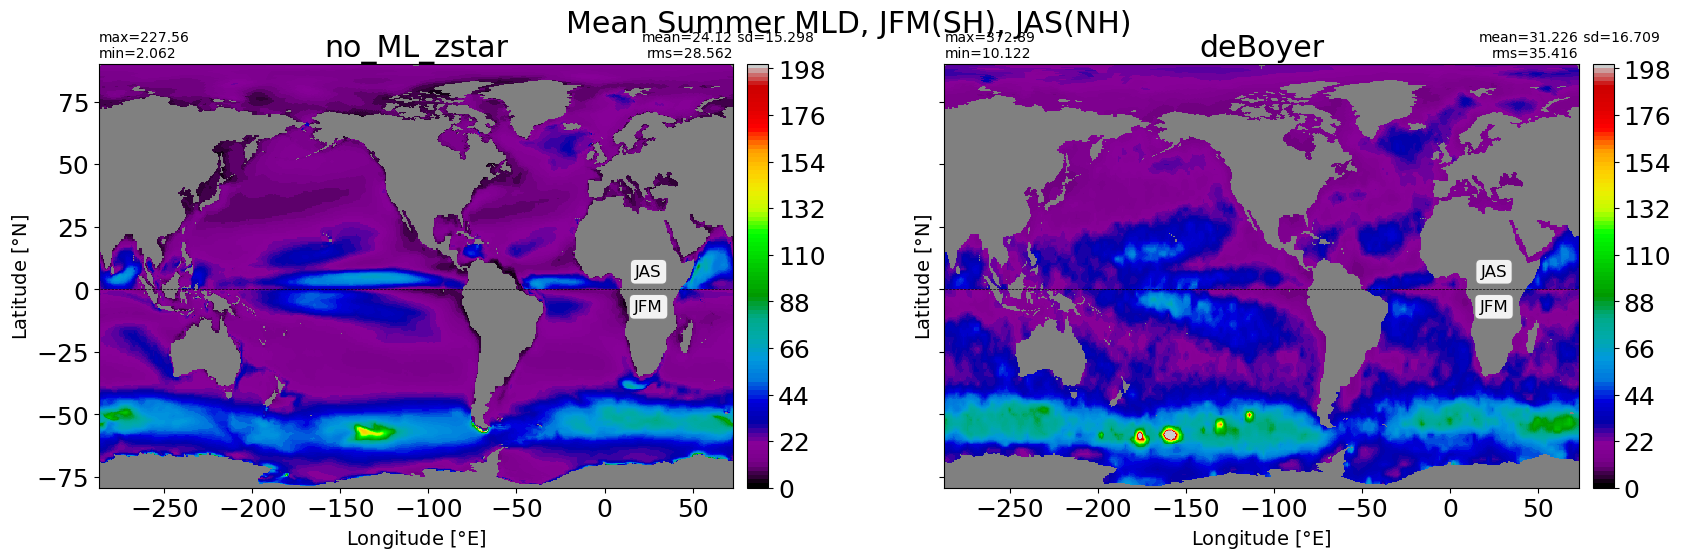

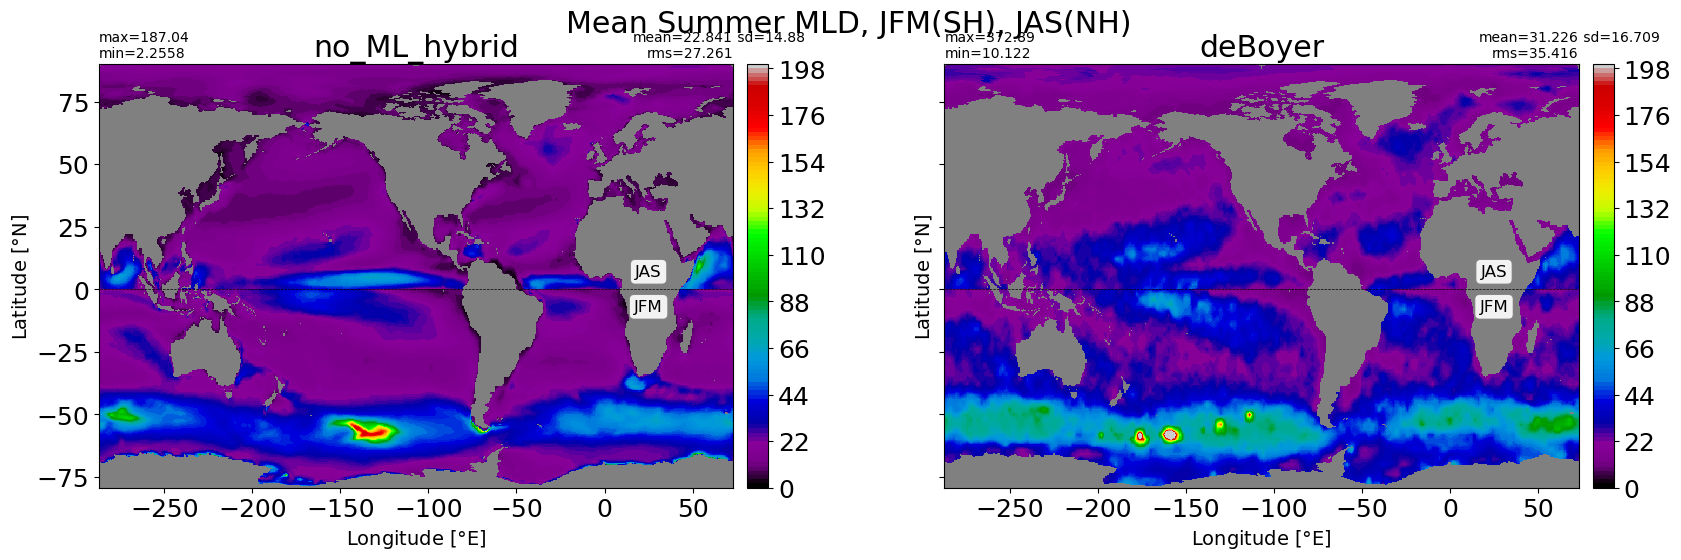

In [7]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
    
  ds = xr.open_dataset(path+case+'_MLD_summer.nc')

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5.5), 
                       sharex=True, sharey=True)
  ax1 = ax.flatten()
  plt.suptitle('Mean Summer MLD, JFM(SH), JAS(NH)')
  # model
  control = np.ma.masked_invalid(ds.MLD_summer.values)
  xyplot(control, grd.geolon, grd.geolat, grd.area_t, 
       title=str(label[i]), axis=ax1[0], 
       clim=(0,200), nbins=100, colormap=plt.cm.nipy_spectral,
       extend='neither')
  add_labels(ax1[0], sh='JFM', nh='JAS')
  # obs
  xyplot(obs_summer, grd.geolon, grd.geolat, grd.area_t, 
       title='deBoyer', axis=ax1[1], 
       clim=(0,200), nbins=100, colormap=plt.cm.nipy_spectral, 
       extend='neither')
  add_labels(ax1[1], sh='JFM', nh='JAS')

### Boundary layer depth

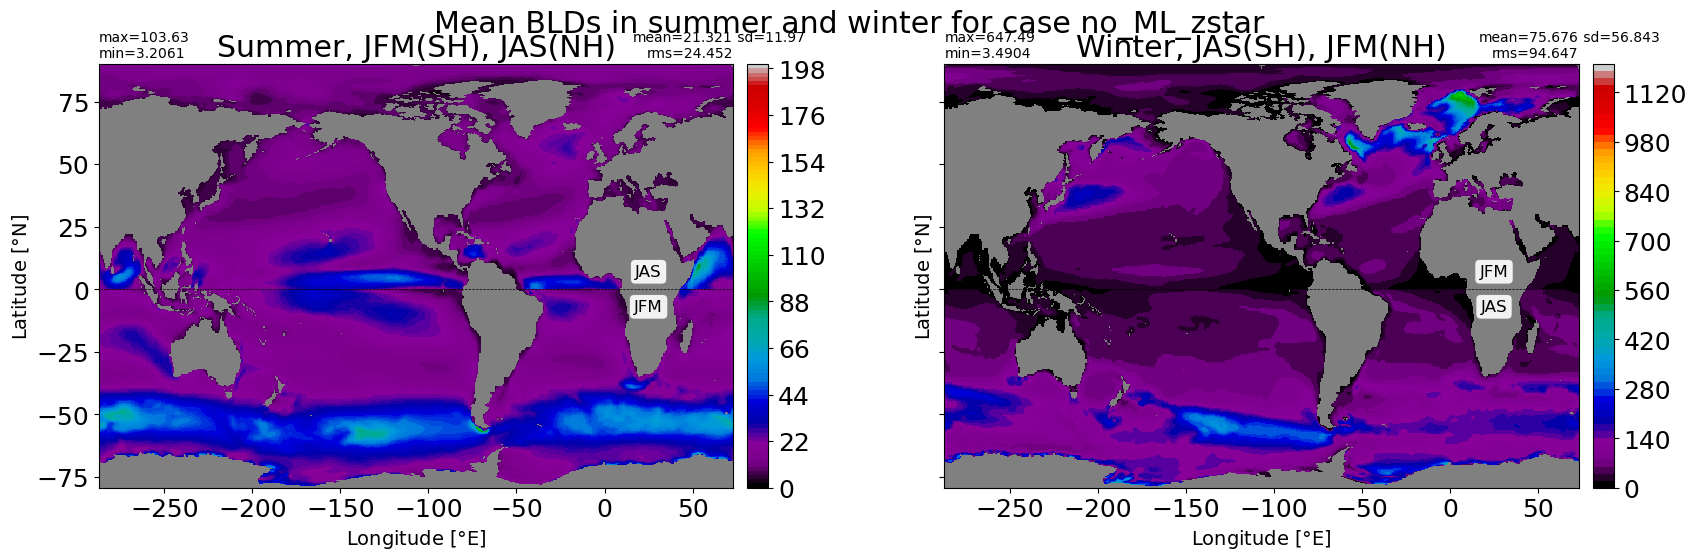

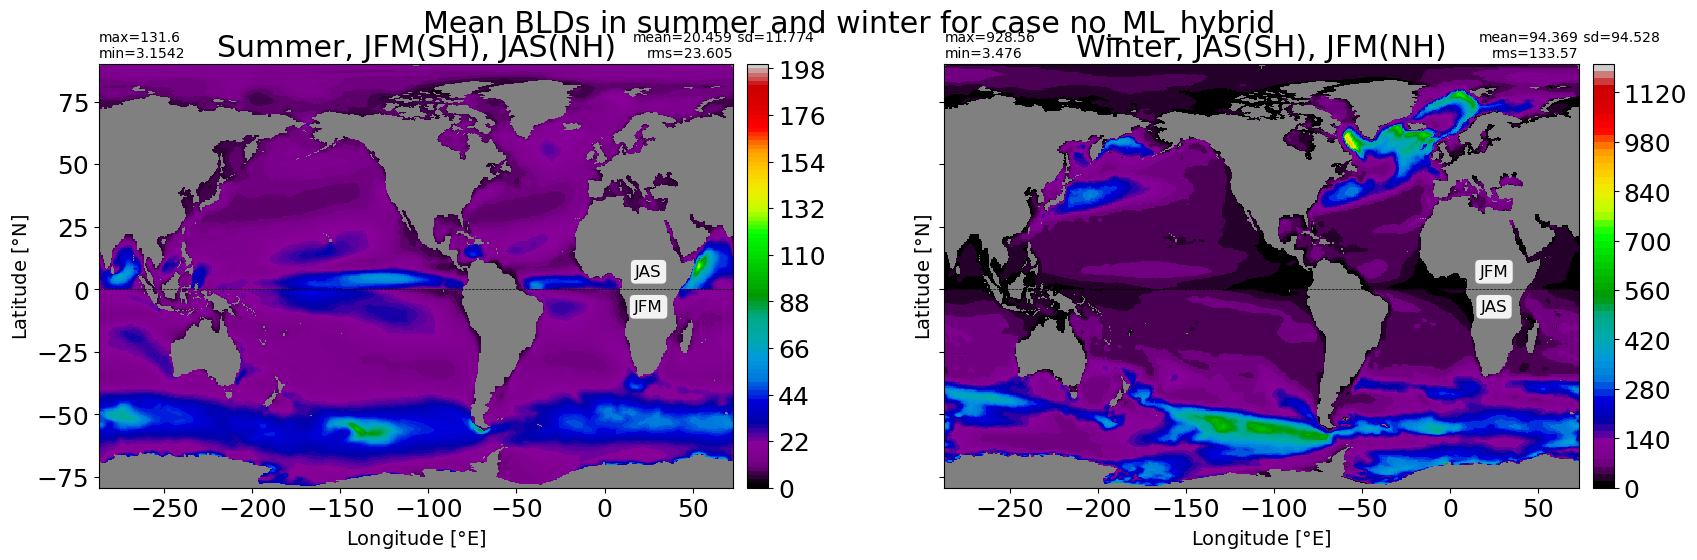

In [8]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
  ds1 =  xr.open_dataset(path+case+'_BLD_summer.nc')
  ds2 =  xr.open_dataset(path+case+'_BLD_winter.nc')
  summer = np.ma.masked_invalid(ds1.BLD_summer.values)
  winter = np.ma.masked_invalid(ds2.BLD_winter.values)

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5.5), 
                       sharex=True, sharey=True)
  ax1 = ax.flatten()
  plt.suptitle('Mean BLDs in summer and winter for case {}'.format(label[i]))
  # summer
  xyplot(summer, grd.geolon, grd.geolat, grd.area_t, 
       title="Summer, JFM(SH), JAS(NH)", axis=ax1[0], 
       clim=(0,200), nbins=100, colormap=plt.cm.nipy_spectral,
       extend='neither')
  add_labels(ax1[0], sh='JFM', nh='JAS')
  # obs
  xyplot(winter, grd.geolon, grd.geolat, grd.area_t, 
       title='Winter, JAS(SH), JFM(NH)', axis=ax1[1], 
       clim=(0,1200), nbins=100, colormap=plt.cm.nipy_spectral, 
       extend='neither')
  add_labels(ax1[1])